# Hw2.1.ipynb

Знайдено таблиць: 72
Регіони з рівнем народжуваності у 2019 вищим за середній:
               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0


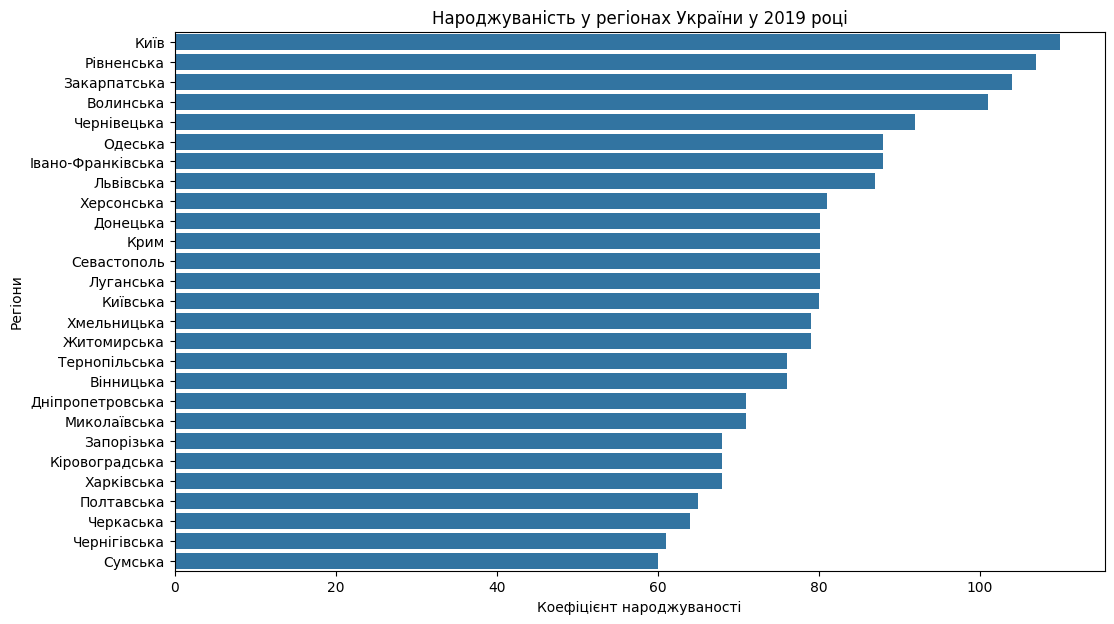

In [1]:

# Завдання 1: Парсинг даних із Wikipedia та аналіз

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Завантаження даних
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

# Завантажуємо всі таблиці зі сторінки
all_tables = pd.read_html(url)
print(f"Знайдено таблиць: {len(all_tables)}")

# Пошук таблиці за наявністю стовпця "2019"
dataframe = None
for i, table in enumerate(all_tables):
    if isinstance(table.columns, pd.MultiIndex):
        table.columns = ['_'.join(map(str, col)).strip() for col in table.columns]
    table.columns = table.columns.astype(str)
    if "2019" in table.columns:
        dataframe = table
        break

if dataframe is None:
    raise ValueError("Таблиця з даними за 2019 рік не знайдена")

# 2. Обробка даних
dataframe.replace(["—", "-", "—"], np.nan, inplace=True)

# Конвертація стовпців на числовий тип
for column in dataframe.columns[1:]:
    dataframe[column] = pd.to_numeric(dataframe[column], errors='coerce')

# Видалення загального рядка
dataframe = dataframe[~dataframe.iloc[:, 0].isin(["Вся Країна", "Україна"])]

# Заповнення пропусків середніми значеннями
numeric_cols = dataframe.select_dtypes(include=[np.number]).columns
dataframe.loc[:, numeric_cols] = dataframe[numeric_cols].fillna(dataframe[numeric_cols].mean())

# 3. Аналіз даних
mean_2019 = dataframe["2019"].mean()
higher_birthrate_regions = dataframe[dataframe["2019"] > mean_2019]
print("Регіони з рівнем народжуваності у 2019 вищим за середній:")
print(higher_birthrate_regions)

# Побудова графіка
plt.figure(figsize=(12, 7))
sns.barplot(x="2019", y=dataframe.columns[0], data=dataframe.sort_values("2019", ascending=False))
plt.title("Народжуваність у регіонах України у 2019 році")
plt.xlabel("Коефіцієнт народжуваності")
plt.ylabel("Регіони")
plt.show()
